# EDA

In [84]:
import os
import sys
import librosa
import librosa.display
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

### Basic analysis of audio and getting some doamin knowledge

* we will take first audio file of each category we have and analyze them

In [2]:
current_working_directory= os.getcwd()
main_directory = os.path.dirname(current_working_directory)
category_data_folder_path = os.path.join(main_directory,"Audio_Data")

In [3]:
def get_child_discomfort_categories(category_data_folder_path):
    child_discomfort_categories_raw = os.listdir(category_data_folder_path)
    
    child_discomfort_categories = []
    for i in child_discomfort_categories_raw:
        cat = i.replace("_"," ")
        cat = " ".join(word.capitalize() for word in cat.split())
        child_discomfort_categories.append(cat)
        
    return child_discomfort_categories_raw, child_discomfort_categories

child_discomfort_categories_raw, child_discomfort_categories = get_child_discomfort_categories(category_data_folder_path)

In [4]:
def count_audio_files(folder_path):
    category_and_first_audio_path = {}
    
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        
        if os.path.isdir(category_path):
            audio_file = [file for file in os.listdir(category_path) if file.endswith('.wav') or file.endswith('.mp3')][0]
            first_audio_file_path = os.path.join(category_path,audio_file)
            category_and_first_audio_path[category] = first_audio_file_path
    
    return category_and_first_audio_path

category_and_first_audio_path = count_audio_files(category_data_folder_path)
print(category_and_first_audio_path)

{'asphyxia': 'd:\\External_Projects\\Infant_Cry_Audio_Classification\\Audio_Data\\asphyxia\\1_part2_1.wav', 'deaf': 'd:\\External_Projects\\Infant_Cry_Audio_Classification\\Audio_Data\\deaf\\10_part_1.wav', 'normal': 'd:\\External_Projects\\Infant_Cry_Audio_Classification\\Audio_Data\\normal\\10_part_1.wav', 'not_cry': 'd:\\External_Projects\\Infant_Cry_Audio_Classification\\Audio_Data\\not_cry\\109n.wav', 'others': 'd:\\External_Projects\\Infant_Cry_Audio_Classification\\Audio_Data\\others\\03ADDCFB-354E-416D-BF32-260CF47F7060-1433658024-1.1-f-04-ti.wav', 'pain': 'd:\\External_Projects\\Infant_Cry_Audio_Classification\\Audio_Data\\pain\\10_part2_1.wav'}


In [5]:
def get_insights_categorically(category,audio_path):
    plt.figure(figsize=(14,5))
    print(f"You are looking at details of {category}")
    data,sample_rate = librosa.load(audio_path)
    librosa.display.waveshow(data,sr=sample_rate,color='green')
    print(f"The sample rate of given audio file is {sample_rate}")
    print(f"The sample signal data of given audio file after normalizationa is\n{data}")

You are looking at details of asphyxia
The sample rate of given audio file is 22050
The sample signal data of given audio file after normalizationa is
[-0.00234709 -0.00262578 -0.00247527 ... -0.00303473 -0.00259125
 -0.00131909]


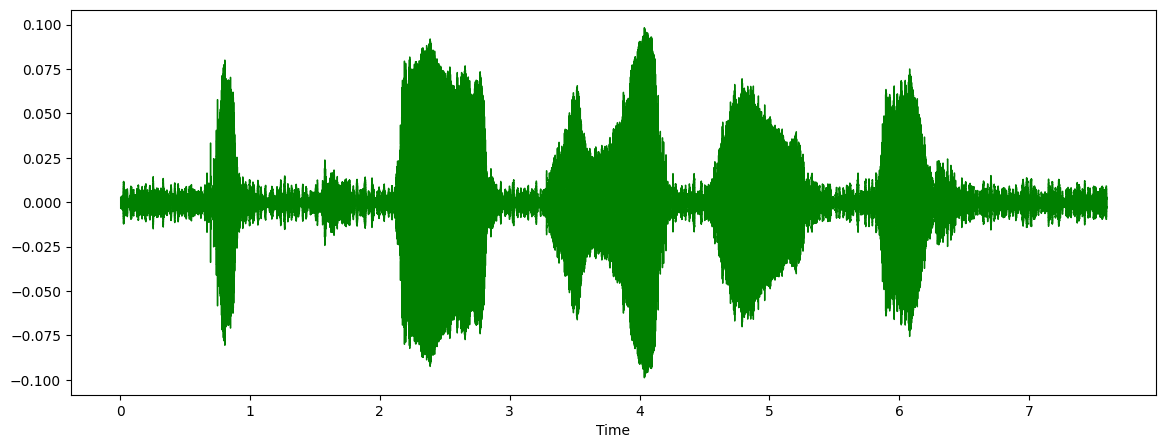

In [6]:
get_insights_categorically('asphyxia',r'D:\External_Projects\Infant_Cry_Audio_Classification\Audio_Data\asphyxia\1_part2_7.wav')

You are looking at details of deaf
The sample rate of given audio file is 22050
The sample signal data of given audio file after normalizationa is
[ 0.00952559  0.00796311  0.0014414  ... -0.00171047 -0.0011824
 -0.00068354]


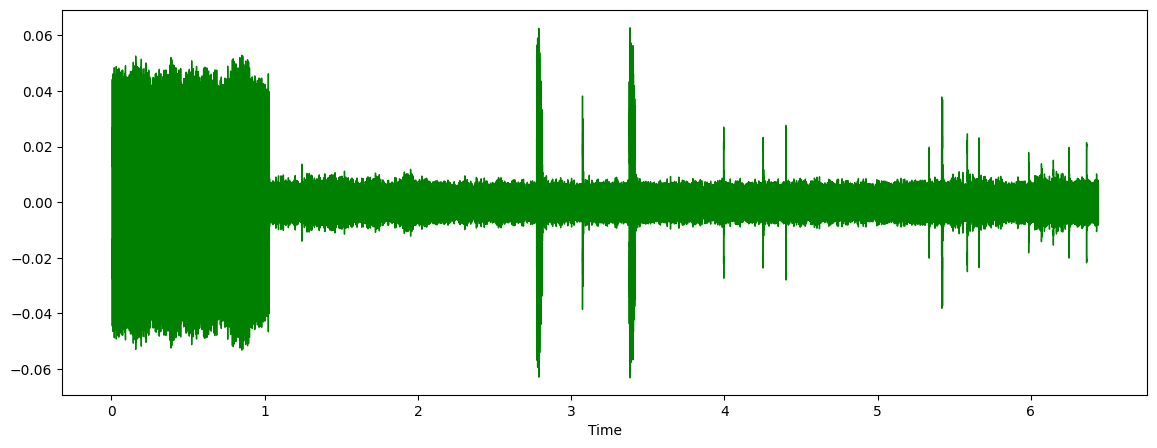

In [7]:
get_insights_categorically('deaf',r'D:\External_Projects\Infant_Cry_Audio_Classification\Audio_Data\deaf\1_part_3.wav')

You are looking at details of normal
The sample rate of given audio file is 22050
The sample signal data of given audio file after normalizationa is
[-0.00855769 -0.00944815 -0.00402368 ...  0.01587616 -0.00067831
  0.        ]


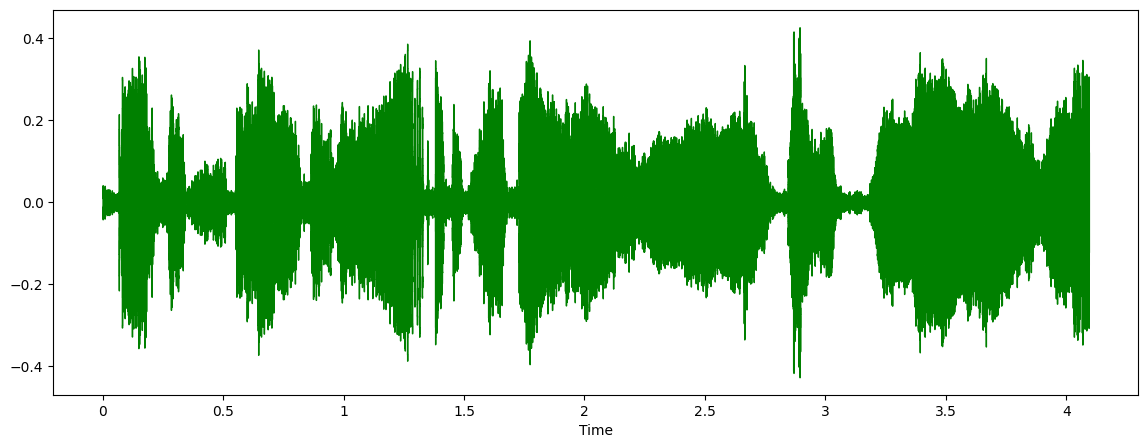

In [8]:
get_insights_categorically('normal',r'D:\External_Projects\Infant_Cry_Audio_Classification\Audio_Data\normal\4_part_1.wav')

You are looking at details of others
The sample rate of given audio file is 22050
The sample signal data of given audio file after normalizationa is
[-5.5739791e-05 -5.2060837e-05 -2.0394320e-05 ... -3.9311927e-02
 -2.5359783e-02 -1.0277029e-02]


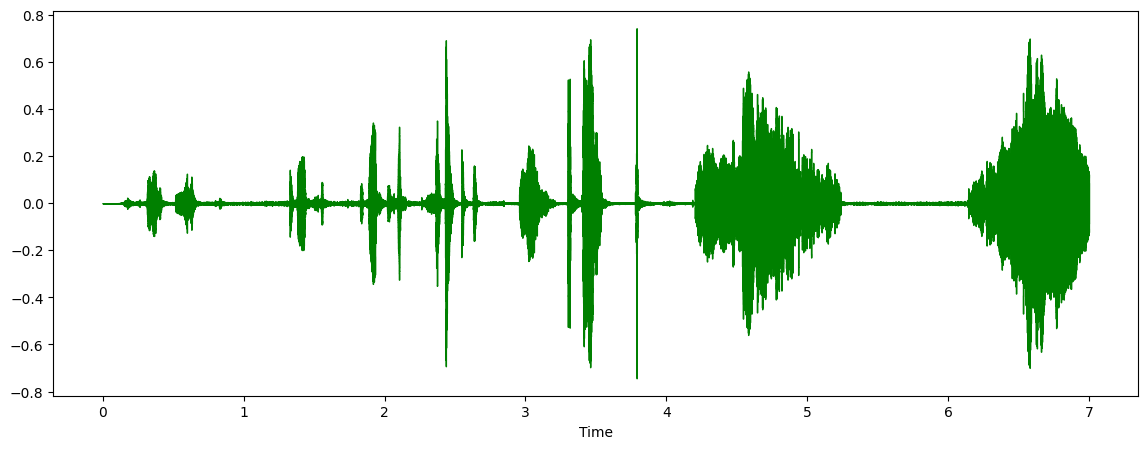

In [9]:
get_insights_categorically('others',r'D:\External_Projects\Infant_Cry_Audio_Classification\Audio_Data\others\79FF400A-97E2-4701-987D-C7C850D5523C-1430089487-1.0-f-48-ti.wav')

You are looking at details of pain
The sample rate of given audio file is 22050
The sample signal data of given audio file after normalizationa is
[0.00719174 0.00877098 0.0080456  ... 0.00882375 0.00331919 0.00063748]


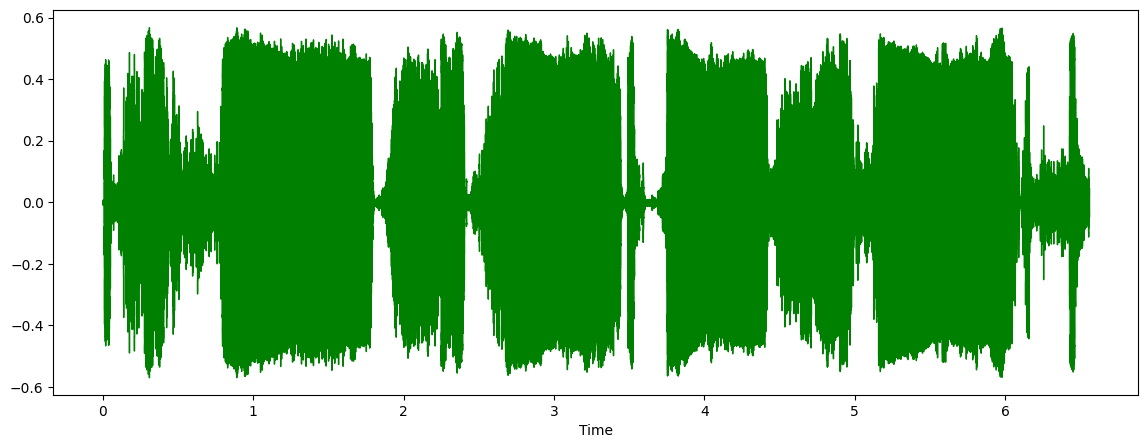

In [10]:
get_insights_categorically('pain',r'D:\External_Projects\Infant_Cry_Audio_Classification\Audio_Data\pain\16_part2_1.wav')

In [82]:
get_insights_categorically('tired','d:\\External_Projects\\Infant_Cry_Audio_Classification\\Audio_Data\\tired\\03ADDCFB-354E-416D-BF32-260CF47F7060-1433658024-1.1-f-04-ti.wav')

You are looking at details of tired


FileNotFoundError: [Errno 2] No such file or directory: 'd:\\External_Projects\\Infant_Cry_Audio_Classification\\Audio_Data\\tired\\03ADDCFB-354E-416D-BF32-260CF47F7060-1433658024-1.1-f-04-ti.wav'

<Figure size 1400x500 with 0 Axes>

#### It can be observed that sound pattern/waveplot for each discomfort category of infant cry audio is different.

## About Sample rate:

* Sample rate is the number of samples per second that are taken of a waveform to create a discete digital signal. The higher the sample rate, the more snapshots you capture of the audio signal. The audio sample rate is measured in kilohertz (kHz) and it determines the range of frequencies captured in digital audio. The more samples taken, the more accurate the digital file will be. A high enough sampling rate allows us to capture every detail of the original sound. 
* For most music applications, 44.1 kHz is the best sample rate to go for. 48 kHz is common when creating music or other audio for video

#### Librosa sets the sampling rate to 22050 that is 22.050 KHz by default

* There are differnet ways of reading audio files such as using "Scipy" which offers different sample rate.

## About sample signal data

#### Librosa normalizes the audio signal data which is nothing but like frequency at given period of timme.

## About channels in audio

* Most of the time in audio we have two channels which we called as "Stereo" avaliable in many headphones.

#### Librosa converts and "stereo" to "mono" channel which is one of many benefits of using it.

# Feature Extraction

* Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse
both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [13]:
def feature_extractor_main(audio_file_path):
    audio,sample_rate = librosa.load(audio_file_path)
    mffcs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features = np.mean(mffcs_features.T,axis=0)
    return mfccs_scaled_features

In [14]:
def feature_extractor(category_data_folder_path):
    extracted_features = []
    child_discomfort_categories_raw, child_discomfort_categories = get_child_discomfort_categories(category_data_folder_path)
    for cat in child_discomfort_categories_raw:
        audio_cat_folder_path = os.path.join(category_data_folder_path,cat)
        for file in os.listdir(audio_cat_folder_path):
            if file.endswith('.wav') or file.endswith('.mp3'):
                audio_file_path = os.path.join(audio_cat_folder_path,file)
                mfccs_scaled_features = feature_extractor_main(audio_file_path)
                extracted_features.append([cat,mfccs_scaled_features])
    return extracted_features

In [175]:
extracted_features = feature_extractor(category_data_folder_path)
print(extracted_features)

[['asphyxia', array([-5.09438751e+02,  1.33502899e+02, -1.46706219e+01,  4.54257088e+01,
        1.03613014e+01,  1.60628090e+01,  2.22898865e+01, -6.66191816e+00,
        1.87906704e+01,  3.00903130e+00, -6.96953297e-01,  1.42664585e+01,
       -1.21994950e-01,  1.13141518e+01,  5.62162161e+00, -2.44041681e+00,
        5.88021708e+00, -1.49546635e+00,  3.17518950e+00, -5.84606290e-01,
       -4.76401997e+00,  4.29804516e+00,  1.00435984e+00,  2.57083249e+00,
        1.13864875e+00, -1.49558321e-01,  3.69620132e+00, -1.89657032e+00,
        1.57327628e+00,  4.42608356e+00,  3.01352072e+00,  3.98993039e+00,
        6.21699929e-01,  4.26328468e+00,  2.67023110e+00,  1.97610810e-01,
        3.79870200e+00, -1.62533379e+00,  6.67355299e-01,  3.31487966e+00],
      dtype=float32)], ['asphyxia', array([-4.2910336e+02,  1.3033963e+02, -2.2146925e+01,  3.1498243e+01,
        2.9925616e+00,  1.4319461e+01,  2.5021437e+01, -4.4797645e+00,
        1.9260838e+01,  5.4733367e+00, -2.5063426e+00,  1

In [176]:
features_and_class_data= pd.DataFrame(extracted_features,columns=['Class','Features'])

In [177]:
features_and_class_data

,Class,Features
0,asphyxia,"[-509.43875, 133.5029, -14.670622, 45.42571, 1..."
1,asphyxia,"[-429.10336, 130.33963, -22.146925, 31.498243,..."
2,asphyxia,"[-512.8092, 144.38297, -45.292587, 51.233273, ..."
3,asphyxia,"[-478.68103, 158.52989, -25.152557, 31.757399,..."
4,asphyxia,"[-450.50305, 154.58798, -40.745937, 30.536585,..."
...,...,...
628,pain,"[29.169859, 53.69685, -29.98631, -7.34964, -23..."
629,pain,"[29.169859, 53.69685, -29.98631, -7.34964, -23..."
630,pain,"[-31.641758, 206.31711, -129.72485, 2.2379932,..."
631,pain,"[-28.971014, 209.01712, -134.11037, 2.966941, ..."


In [168]:
features_and_class_data['Class'].value_counts()

Class
deaf        141
pain        128
asphyxia    106
normal      103
not_cry      96
others       59
Name: count, dtype: int64

### Dependent and Independent split of data

In [88]:
X = np.array(features_and_class_data['Features'].to_list())
y = np.array(features_and_class_data['Class'].to_list())

In [89]:
X.shape

(633, 40)

In [90]:
y.shape

(633,)

### Label encoding on my dependent feature y

In [91]:
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))

In [92]:
y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [94]:
y.shape

(633, 6)

### Train Test Split

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Model Building 1

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [97]:
num_labels = y.shape[1]

In [132]:
model = Sequential()
model.add(Dense(100,input_shape=(40,)))
model.add(Activation(LeakyReLU(alpha=0.3)))
model.add(Dropout(0.5))

model.add(Dense(150,))
model.add(Activation(LeakyReLU(alpha=0.2)))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation(LeakyReLU(alpha=0.1)))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [133]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 100)               4100      
                                                                 
 activation_25 (Activation)  (None, 100)               0         
                                                                 
 dropout_19 (Dropout)        (None, 100)               0         
                                                                 
 dense_26 (Dense)            (None, 150)               15150     
                                                                 
 activation_26 (Activation)  (None, 150)               0         
                                                                 
 dropout_20 (Dropout)        (None, 150)               0         
                                                                 
 dense_27 (Dense)            (None, 100)              

In [134]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [135]:
def create_folder_if_not_exists():
    current_working_directory= os.getcwd()
    main_dir_path = os.path.dirname(current_working_directory)
    artifact_folder_path = os.path.join(main_dir_path,"Artifact")
    if not os.path.exists(artifact_folder_path):
        os.makedirs(artifact_folder_path)
    return artifact_folder_path

In [136]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

In [137]:
num_epochs = 100
num_batch_size = 30
artifact_folder_path = create_folder_if_not_exists()
checkpointer = ModelCheckpoint(filepath='infant_cry_audio_classifier_model.hdf5',verbose=1,save_best_only=True)
start = datetime.now()
model.fit(X_train,y_train,batch_size=num_batch_size,epochs=num_epochs,validation_data=(X_test, y_test),callbacks=[checkpointer])
duration = datetime.now() - start
print(f"The model training takes {duration}")

Epoch 1/100
10/17 [================>.............] - ETA: 0s - loss: 50.6425 - accuracy: 0.1500 
Epoch 1: val_loss improved from inf to 6.11664, saving model to infant_cry_audio_classifier_model.hdf5
17/17 [==============================] - 3s 59ms/step - loss: 45.0364 - accuracy: 0.1897 - val_loss: 6.1166 - val_accuracy: 0.5197
Epoch 2/100
 9/17 [==============>...............] - ETA: 0s - loss: 28.8339 - accuracy: 0.2519
Epoch 2: val_loss improved from 6.11664 to 2.94045, saving model to infant_cry_audio_classifier_model.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 25.6082 - accuracy: 0.2589 - val_loss: 2.9404 - val_accuracy: 0.6299
Epoch 3/100
12/17 [====================>.........] - ETA: 0s - loss: 19.1285 - accuracy: 0.2750
Epoch 3: val_loss improved from 2.94045 to 1.84540, saving model to infant_cry_audio_classifier_model.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 17.9920 - accuracy: 0.2866 - val_loss: 1.8454 - val_accuracy: 0.5906
E

In [138]:
y_test

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0.

In [139]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 5ms/step


In [141]:
y_pred

array([[5.79150146e-05, 5.92888275e-04, 9.93336797e-01, 1.44735293e-06,
        3.34577984e-03, 2.66510621e-03],
       [2.59125780e-04, 6.06622268e-03, 9.83485699e-01, 3.45580293e-06,
        5.46490587e-03, 4.72053280e-03],
       [3.94333678e-04, 6.72508904e-04, 4.34644535e-05, 9.06830490e-01,
        7.77357519e-02, 1.43234432e-02],
       [5.15122898e-02, 9.47555542e-01, 8.80383537e-04, 5.07865479e-07,
        1.04497203e-05, 4.09432141e-05],
       [9.33301356e-03, 3.02465670e-02, 1.19932937e-02, 3.59232575e-02,
        6.73994899e-01, 2.38508925e-01],
       [2.04302500e-14, 1.66451228e-15, 1.49950370e-06, 6.09649482e-18,
        2.22368617e-05, 9.99976277e-01],
       [3.33691307e-04, 9.99433219e-01, 2.26083081e-04, 4.46560594e-10,
        8.77506707e-08, 6.90498518e-06],
       [7.83653080e-01, 1.76497847e-02, 1.75251409e-01, 1.92978664e-03,
        9.10120923e-03, 1.24147693e-02],
       [4.91899542e-11, 1.01708419e-08, 3.55397162e-07, 1.67736949e-10,
        2.55001960e-05, 

In [142]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_actual_classes = np.argmax(y_test, axis=1)

In [143]:
y_pred_classes

array([2, 2, 3, 1, 4, 5, 1, 0, 5, 1, 2, 0, 0, 0, 5, 0, 0, 2, 0, 2, 1, 2,
       0, 5, 5, 1, 3, 2, 5, 2, 4, 4, 1, 5, 1, 2, 2, 5, 1, 2, 3, 1, 0, 4,
       2, 1, 2, 1, 0, 3, 1, 2, 0, 1, 5, 4, 1, 5, 3, 0, 5, 4, 1, 0, 2, 2,
       0, 3, 4, 5, 4, 0, 0, 2, 1, 5, 4, 0, 3, 2, 1, 0, 3, 3, 1, 5, 5, 1,
       1, 1, 2, 2, 0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 2, 4, 1, 0, 4, 1, 4, 1,
       0, 1, 0, 1, 2, 1, 5, 3, 5, 1, 2, 3, 2, 1, 1, 5, 3], dtype=int64)

In [144]:
y_actual_classes

array([2, 2, 3, 1, 4, 5, 1, 0, 5, 1, 2, 0, 0, 0, 5, 0, 0, 2, 2, 2, 1, 2,
       0, 5, 5, 1, 3, 2, 5, 2, 4, 4, 1, 5, 1, 2, 2, 5, 1, 2, 3, 0, 0, 4,
       2, 1, 2, 1, 0, 3, 1, 2, 0, 1, 5, 5, 1, 5, 3, 0, 5, 4, 1, 0, 2, 2,
       0, 3, 5, 5, 5, 0, 0, 2, 1, 5, 5, 0, 3, 2, 1, 0, 3, 3, 1, 5, 5, 1,
       1, 1, 2, 2, 0, 2, 0, 2, 3, 2, 2, 2, 3, 2, 2, 5, 1, 0, 4, 1, 5, 1,
       0, 1, 0, 1, 2, 1, 5, 3, 5, 1, 2, 3, 2, 1, 1, 5, 3], dtype=int64)

In [145]:
accuracy = accuracy_score(y_actual_classes, y_pred_classes)
print("Accuracy:", accuracy)

Accuracy: 0.9291338582677166


In [129]:
conf_matrix = confusion_matrix(y_actual_classes, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[22  1  0  0  0  0]
 [ 0 29  0  0  0  0]
 [ 2  0 29  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  4 20]]


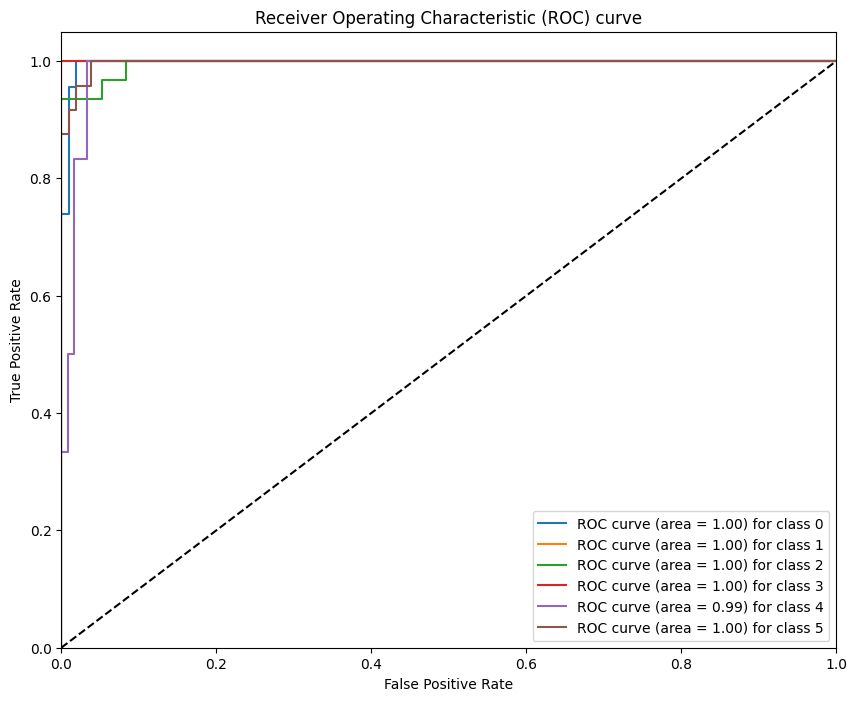

In [131]:
n_classes = y_test.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# Prediction Model 1

In [ ]:
from keras.models import load_model
def prediction(audio_file):
    audio,sample_rate = librosa.load(audio_file)
    mffcs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features = np.mean(mffcs_features.T,axis=0)
    features = mfccs_scaled_features.reshape(1,-1)
    model = load_model(r'D:\External_Projects\Infant_Cry_Audio_Classification\Rersearch\infant_cry_audio_classifier_model.hdf5') 
    output = model.predict(features)
    print(output)
    output = list(output[0]).index(max(list(output[0])))
    output = child_discomfort_categories[output]
    print(output)

In [166]:
prediction(r"D:\External_Projects\Infant_Cry_Audio_Classification\Audio_Data\asphyxia\5_part2_4.wav")

1/1 [==============================] - 0s 103ms/step
[[8.3077455e-01 2.7463939e-02 1.3354383e-01 3.0928661e-04 2.1091385e-03
  5.7992204e-03]]
Asphyxia


# Model building 2

In [178]:
df = features_and_class_data

In [179]:
df_exploded = df.explode("Features")

In [180]:
for i in range(40):
    df[f"Feature_{i+1}"] = df["Features"].apply(lambda x: x[i] if len(x) > i else None)

In [181]:
df.drop(columns=["Features"], inplace=True)

In [182]:
df

,Class,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_31,Feature_32,Feature_33,Feature_34,Feature_35,Feature_36,Feature_37,Feature_38,Feature_39,Feature_40
0,asphyxia,-509.438751,133.502899,-14.670622,45.425709,10.361301,16.062809,22.289886,-6.661918,18.790670,...,3.013521,3.989930,0.621700,4.263285,2.670231,0.197611,3.798702,-1.625334,0.667355,3.314880
1,asphyxia,-429.103363,130.339630,-22.146925,31.498243,2.992562,14.319461,25.021437,-4.479764,19.260838,...,-1.315864,3.520047,0.016293,1.189975,0.621417,-0.862812,2.462370,-0.927585,0.978588,2.913311
2,asphyxia,-512.809204,144.382965,-45.292587,51.233273,3.728040,15.480604,33.057243,-8.960519,23.915836,...,-1.038806,4.825384,0.414364,3.427109,2.011868,-0.087840,5.162412,-0.544941,1.657766,2.743548
3,asphyxia,-478.681030,158.529892,-25.152557,31.757399,1.858092,18.689701,27.509399,-11.126746,16.821674,...,2.250744,7.583652,1.051453,2.445950,3.106311,0.293718,3.410690,0.698355,2.951213,1.856254
4,asphyxia,-450.503052,154.587982,-40.745937,30.536585,3.520589,12.321450,24.066553,-8.209265,20.781223,...,2.394281,7.252883,4.054532,6.375284,4.240281,0.236346,3.369999,-1.069593,-0.739927,-0.965160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,pain,29.169859,53.696850,-29.986309,-7.349640,-23.160046,-14.052996,-8.101643,5.119384,-4.377244,...,4.895878,4.659432,-0.504536,2.905613,1.016191,0.603946,-1.411605,1.351908,-1.121466,-0.936593
629,pain,29.169859,53.696850,-29.986309,-7.349640,-23.160046,-14.052996,-8.101643,5.119384,-4.377244,...,4.895878,4.659432,-0.504536,2.905613,1.016191,0.603946,-1.411605,1.351908,-1.121466,-0.936593
630,pain,-31.641758,206.317108,-129.724854,2.237993,19.333351,-44.810921,38.135910,11.843584,-37.716339,...,-0.914657,-4.306543,7.299099,-2.377983,-3.059120,5.804506,-3.465831,0.497683,5.894989,-5.103801
631,pain,-28.971014,209.017120,-134.110367,2.966941,21.162683,-43.355171,40.366348,10.668252,-39.565300,...,-1.302793,-3.970168,7.726359,-3.051842,-3.688297,5.488653,-4.193030,-0.132710,5.381714,-5.410634


In [185]:
df.to_csv("Features_data_set.csv")

In [188]:
from sklearn.preprocessing import LabelEncoder
label_encoder_2 = LabelEncoder()


In [192]:
df["Class"] = list(label_encoder_2.fit_transform(df["Class"]))

In [193]:
df

,Class,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_31,Feature_32,Feature_33,Feature_34,Feature_35,Feature_36,Feature_37,Feature_38,Feature_39,Feature_40
0,0,-509.438751,133.502899,-14.670622,45.425709,10.361301,16.062809,22.289886,-6.661918,18.790670,...,3.013521,3.989930,0.621700,4.263285,2.670231,0.197611,3.798702,-1.625334,0.667355,3.314880
1,0,-429.103363,130.339630,-22.146925,31.498243,2.992562,14.319461,25.021437,-4.479764,19.260838,...,-1.315864,3.520047,0.016293,1.189975,0.621417,-0.862812,2.462370,-0.927585,0.978588,2.913311
2,0,-512.809204,144.382965,-45.292587,51.233273,3.728040,15.480604,33.057243,-8.960519,23.915836,...,-1.038806,4.825384,0.414364,3.427109,2.011868,-0.087840,5.162412,-0.544941,1.657766,2.743548
3,0,-478.681030,158.529892,-25.152557,31.757399,1.858092,18.689701,27.509399,-11.126746,16.821674,...,2.250744,7.583652,1.051453,2.445950,3.106311,0.293718,3.410690,0.698355,2.951213,1.856254
4,0,-450.503052,154.587982,-40.745937,30.536585,3.520589,12.321450,24.066553,-8.209265,20.781223,...,2.394281,7.252883,4.054532,6.375284,4.240281,0.236346,3.369999,-1.069593,-0.739927,-0.965160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,5,29.169859,53.696850,-29.986309,-7.349640,-23.160046,-14.052996,-8.101643,5.119384,-4.377244,...,4.895878,4.659432,-0.504536,2.905613,1.016191,0.603946,-1.411605,1.351908,-1.121466,-0.936593
629,5,29.169859,53.696850,-29.986309,-7.349640,-23.160046,-14.052996,-8.101643,5.119384,-4.377244,...,4.895878,4.659432,-0.504536,2.905613,1.016191,0.603946,-1.411605,1.351908,-1.121466,-0.936593
630,5,-31.641758,206.317108,-129.724854,2.237993,19.333351,-44.810921,38.135910,11.843584,-37.716339,...,-0.914657,-4.306543,7.299099,-2.377983,-3.059120,5.804506,-3.465831,0.497683,5.894989,-5.103801
631,5,-28.971014,209.017120,-134.110367,2.966941,21.162683,-43.355171,40.366348,10.668252,-39.565300,...,-1.302793,-3.970168,7.726359,-3.051842,-3.688297,5.488653,-4.193030,-0.132710,5.381714,-5.410634


In [195]:
X = df.drop(columns=["Class"])
y = df["Class"]

In [196]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [204]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,roc_curve, auc

In [212]:
scalers = { 
             "standard_scaler" : StandardScaler(),
             "minmax_scaler" : MinMaxScaler(),
             "robust_scaler" : RobustScaler()
          }

models = {
            "logistics_regressor" : LogisticRegression(),
            "gaussian_naivebayes" : GaussianNB(),
            "decisiontree_classifier" : DecisionTreeClassifier(),
            "svc" : SVC(),
            "kneighbors_classifier" : KNeighborsClassifier(),
            "randomforest_classifier" : RandomForestClassifier()
         }

In [215]:
def basic_model_training_evaluation(X_train,X_test,y_train,y_test):
    print("===============================================Training and Evaluation without scaling==========================================================")
    for key,value in models.items():
        print(f"Working with {key}")
        model = value
        model.fit(X_train,y_train)
        y_pred_no_scaling = model.predict(X_test)
        print("-------------Getting Metrics---------------")
        accuracy = accuracy_score(y_test,y_pred_no_scaling)
        print(f"The {key} has accuracy of {accuracy}")
        precision = precision_score(y_test,y_pred_no_scaling,average=None)
        print(f"The {key} has precission of {precision}")
        recall = recall_score(y_test,y_pred_no_scaling,average=None)
        print(f"The {key} has recall of {recall}")
        cf = confusion_matrix(y_test,y_pred_no_scaling)
        print(f"The confusion matrix for {key}\n{cf}")

    for key,value in scalers.items():
        print(f"===============================================Training and Evaluation after scaling using {key}==========================================================")
        scaler = value
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        for key,value in models.items():
            print(f"Working with {key}")
            model = value
            model.fit(X_train_scaled,y_train)
            y_pred_scaling = model.predict(X_test_scaled)
            print("-------------Getting Metrics---------------")
            accuracy = accuracy_score(y_test,y_pred_scaling)
            print(f"The {key} has accuracy of {accuracy}")
            precision = precision_score(y_test,y_pred_scaling,average=None)
            print(f"The {key} has precission of {precision}")
            recall = recall_score(y_test,y_pred_scaling,average=None)
            print(f"The {key} has recall of {recall}")
            cf = confusion_matrix(y_test,y_pred_scaling)
            print(f"The confusion matrix for {key}\n{cf}")

basic_model_training_evaluation(X_train,X_test,y_train,y_test)

===============================================Training and Evaluation without scaling==========================================================
Working with logistics_regressor
-------------Getting Metrics---------------
The logistics_regressor has accuracy of 0.9291338582677166
The logistics_regressor has precission of [0.91304348 1.         0.93548387 1.         0.66666667 0.88      ]
The logistics_regressor has recall of [0.91304348 1.         0.93548387 0.92857143 0.66666667 0.91666667]
The confusion matrix for logistics_regressor
[[21  0  2  0  0  0]
 [ 0 29  0  0  0  0]
 [ 2  0 29  0  0  0]
 [ 0  0  0 13  0  1]
 [ 0  0  0  0  4  2]
 [ 0  0  0  0  2 22]]
Working with gaussian_naivebayes
-------------Getting Metrics---------------
The gaussian_naivebayes has accuracy of 0.8346456692913385
The gaussian_naivebayes has precission of [0.92       0.72222222 0.96428571 1.         0.5        0.83333333]
The gaussian_naivebayes has recall of [1.         0.89655172 0.87096774 1.         1.

* From above data we will further work on RandomForest Classifier with Standard Scalling technique

In [216]:
## Getting specified models

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = RandomForestClassifier()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
print("-------------Getting Metrics---------------")
accuracy = accuracy_score(y_test,y_pred)
print(f"The model has accuracy of {accuracy}")
precision = precision_score(y_test,y_pred,average=None)
print(f"The model has precission of {precision}")
recall = recall_score(y_test,y_pred,average=None)
print(f"The model has recall of {recall}")
cf = confusion_matrix(y_test,y_pred)
print(f"The confusion matrix for model\n{cf}")



-------------Getting Metrics---------------
The model has accuracy of 0.984251968503937
The model has precission of [0.95652174 1.         0.96774194 1.         1.         1.        ]
The model has recall of [0.95652174 1.         0.96774194 1.         1.         1.        ]
The confusion matrix for model
[[22  0  1  0  0  0]
 [ 0 29  0  0  0  0]
 [ 1  0 30  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 24]]


In [240]:
## Prediction pipeline

audio_file = r"D:\External_Projects\Infant_Cry_Audio_Classification\Audio_Data\normal\13_part_1.wav"
audio,sample_rate = librosa.load(audio_file)
mffcs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
mfccs_scaled_features = np.mean(mffcs_features.T,axis=0)
features_df= pd.DataFrame(mfccs_scaled_features.reshape(1, -1), columns=[f"Feature_{i+1}" for i in range(40)])
scaled_input = scaler.transform(features_df)
pred_output = model.predict(scaled_input)
encoded_label = pred_output[0]
le = label_encoder_2
class_name = le.inverse_transform([encoded_label])[0]
print(f"The given audio belongs to {class_name} category") 


The given audio belongs to normal category
